In [3]:
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
X,y = load_svmlight_file("C:/Users/zhancongcong/Desktop/MLdata/housing_scale.txt")

In [5]:
X = X.toarray() #转化成数组类型
X.shape

(506, 13)

In [6]:
X = np.c_[np.ones((X.shape[0],1)),X]
X.shape #添加一列全1

(506, 14)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #分割训练集和验证集

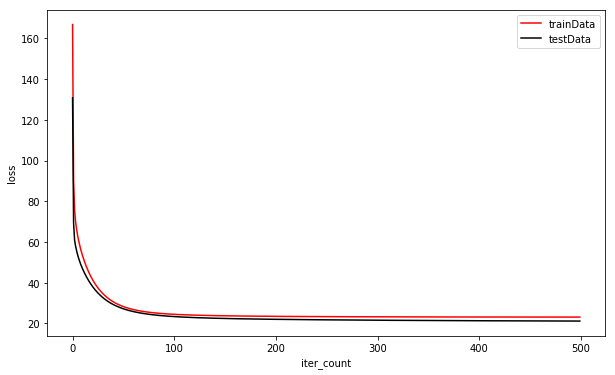

In [8]:
import numpy as np

def bgd(samples, y,samples_t, y_t, step_size=0.0002, max_iter_count=500):  #梯度下降
    sample_num, dim = samples.shape
    sample_num_t, dim = samples_t.shape
    LOSS = [] #训练集的loss
    LOSS_T = [] #验证集的loss
    w = np.ones((dim,), dtype=np.float32)
    loss = 10 
    iter_count = 0
    while loss > 0.001 and iter_count < max_iter_count:
        loss = 0
        loss_t = 0
        G = np.zeros((dim,), dtype=np.float32) #初始化梯度
        for i in range(sample_num):
            predict_y = np.dot(w, samples[i])
            for j in range(dim):
                G[j] += (y[i] - predict_y) * samples[i][j]
        for j in range(dim):
            w[j] += step_size * 2 * G[j]               
        for i in range(sample_num):
            predict_y = np.dot(w, samples[i])
            error = (1 / sample_num ) * np.power((predict_y - y[i]), 2)
            loss += error
        LOSS.append(loss)
        for i in range(sample_num_t):
            predict_y_t = np.dot(w, samples_t[i])
            error_t = (1 / sample_num_t ) * np.power((predict_y_t - y_t[i]), 2)
            loss_t += error_t
        LOSS_T.append(loss_t)        
        iter_count += 1
    return w,LOSS,LOSS_T
   
import matplotlib.pyplot as plt
if __name__ == '__main__': 
    w,LOSS,LOSS_T = bgd(X_train, y_train, X_test, y_test)   
    plt.figure(figsize=(10,6)) 
    plt.plot( LOSS, 'r', label="trainData" ) #红线表示训练集 
    plt.plot( LOSS_T, 'k', label="testData") #黑线表示验证集
    plt.xlabel('iter_count')  
    plt.ylabel('loss')
    plt.legend()
    plt.show()